#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03C Measurig home team advantage in football**

using the football dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
from plotnine import ggplot, aes, geom_histogram
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/workspaces/codespaces-jupyter/data/epl_games.csv")
#df = pd.read_csv("https://osf.io/bdjt5/download")

In [3]:
df.columns.values

array(['div', 'season', 'date', 'team_home', 'team_away', 'points_home',
       'points_away', 'goals_home', 'goals_away'], dtype=object)

In [4]:
df_new = df[df["season"] == 2012]

In [5]:
df_old = df[df["season"] == 2011]

In [6]:
home_goals = df_old.groupby("team_home")["goals_home"].sum()
away_goals = df_old.groupby("team_away")["goals_away"].sum()
goal_sum = (home_goals + away_goals).reset_index()
goal_sum
goal_sum = goal_sum.sort_values(0, ascending=False)
goal_sum

,team_home,0
8,Man City,93
9,Man United,89
0,Arsenal,74
16,Tottenham,66
4,Chelsea,65
10,Newcastle,56
11,Norwich,52
5,Everton,50
2,Blackburn,48
6,Fulham,48


In [11]:
goal_sum_df = goal_sum.rename(columns={"team_home": "team", 0: "goal_sum"})
goal_sum_df
group_labels = ['Low', 'Medium', 'High']
goal_sum_df['group'] = pd.qcut(goal_sum_df['goal_sum'], q=3, labels=group_labels[::-1])
goal_sum_df

,team,goal_sum,group
8,Man City,93,Low
9,Man United,89,Low
0,Arsenal,74,Low
16,Tottenham,66,Low
4,Chelsea,65,Low
10,Newcastle,56,Low
11,Norwich,52,Low
5,Everton,50,Medium
2,Blackburn,48,Medium
6,Fulham,48,Medium


In [21]:
df_new["group_home"] = df_new["team_home"].map(dict(zip(goal_sum_df["team"], goal_sum_df["group"]))).fillna("Bottom")
df_new["group_away"] = df_new["team_away"].map(dict(zip(goal_sum_df["team"], goal_sum_df["group"]))).fillna("Bottom")
df_new

,div,season,date,team_home,team_away,points_home,points_away,goals_home,goals_away,group_home,group_away,home_goaladv
1520,E0,2012,18aug2012,West Ham,Aston Villa,3,0,1,0,Bottom,High,1
1521,E0,2012,18aug2012,Arsenal,Sunderland,1,1,0,0,Low,High,0
1522,E0,2012,18aug2012,Reading,Stoke,1,1,1,1,Bottom,High,0
1523,E0,2012,18aug2012,Newcastle,Tottenham,3,0,2,1,Low,Low,1
1524,E0,2012,18aug2012,Fulham,Norwich,3,0,5,0,Medium,Low,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1895,E0,2012,19may2013,Newcastle,Arsenal,0,3,0,1,Low,Low,-1
1896,E0,2012,19may2013,Chelsea,Everton,3,0,2,1,Low,Medium,1
1897,E0,2012,19may2013,Man City,Norwich,0,3,2,3,Low,Low,-1
1898,E0,2012,19may2013,Swansea,Fulham,0,3,0,3,High,Medium,-3


In [ ]:
# Example: count how many unique home teams played in the 2011 season
df_2011 = df[df['season'] == 2011]['team_home'].unique()
df_2011

array(['Newcastle', 'Blackburn', 'QPR', 'Liverpool', 'Fulham', 'Wigan',
       'West Brom', 'Stoke', 'Man City', 'Chelsea', 'Everton', 'Swansea',
       'Aston Villa', 'Arsenal', 'Sunderland', 'Bolton', 'Wolves',
       'Norwich', 'Man United', 'Tottenham'], dtype=object)

In [13]:
# Count how many times 'NPlayed' appears in the 'group_home' column
df_new['group_home'].value_counts()['New']


np.int64(57)

In [14]:
# Count how many times 'NPlayed' appears in the 'group_home' column
df_new['group_away'].value_counts()['New']


np.int64(57)

## Goal Difference

In [15]:
df_new["home_goaladv"] = df_new["goals_home"] - df_new["goals_away"]

In [16]:
df_new["home_goaladv"].describe()

count    380.000000
mean       0.318421
std        1.717880
min       -6.000000
25%       -1.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: home_goaladv, dtype: float64

In [17]:
pd.DataFrame.from_dict(
    {
        "Statistics": [
            "Mean",
            "Standard deviation",
            "Percent positive",
            "Percent zero",
            "Percent negative",
            "Number of observations",
        ],
        "Value": [
            df_new["home_goaladv"].describe()["mean"],
            df_new["home_goaladv"].describe()["std"],
            (df_new["home_goaladv"] > 0).sum() / df_new["home_goaladv"].shape[0] * 100,
            (df_new["home_goaladv"] == 0).sum() / df_new["home_goaladv"].shape[0] * 100,
            (df_new["home_goaladv"] < 0).sum() / df_new["home_goaladv"].shape[0] * 100,
            df_new["home_goaladv"].describe()["count"],
        ],
    }
).round(1)

,Statistics,Value
0,Mean,0.3
1,Standard deviation,1.7
2,Percent positive,43.7
3,Percent zero,28.4
4,Percent negative,27.9
5,Number of observations,380.0


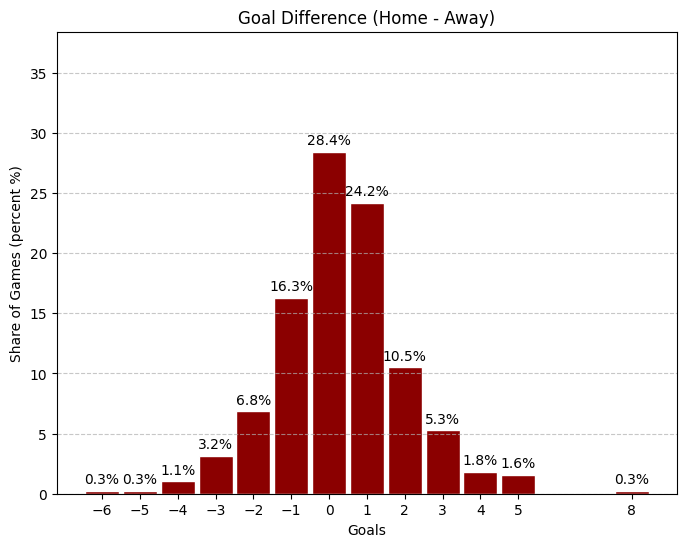

In [20]:
perc = df_new["home_goaladv"].value_counts(normalize=True).sort_index() * 100
goal_diff = sorted(df_new["home_goaladv"].dropna().unique())

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(goal_diff, perc.values, color="darkred", edgecolor="white", width=0.9)


# Add labels above bars
ax.bar_label(bars, labels=[f"{val:.1f}%" for val in perc.values], padding=3)

# Formatting
ax.set_xlabel("Goals")
ax.set_ylabel("Share of Games (percent %)")
ax.set_title("Goal Difference (Home - Away)")
ax.set_xticks(goal_diff)
ax.set_ylim(0, perc.max() + 10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

